In [45]:
import fenics as fe
import matplotlib.pyplot as plt
import numpy as np

In [46]:
from ipywidgets import IntProgress
from IPython.display import display

def log_progress(sequence, every=10):
    progress = IntProgress(min=0, max=len(sequence), value=0)
    display(progress)

    for index, record in enumerate(sequence):
        
        if index % every == 0:
            progress.value = index
        yield record
    progress.value = len(sequence)

### Domain

In [47]:
mesh_dx=20
mesh=fe.RectangleMesh(fe.Point(-2,-2),fe.Point(2,2),mesh_dx,mesh_dx)
space=fe.FunctionSpace(mesh,'Lagrange',1)

### Time

In [48]:
time=10
n_times=10
dt=time/n_times

### Boundaries

In [50]:
def boundary(x,x_boundary): #Implement 
    return x_boundary

f_bound=fe.Constant(0)
bcs = fe.DirichletBC(space, f_bound, boundary)

### Equations

d2f/dx2 + f + g = w*df/dt

In [51]:
dx=fe.dx
Dot=fe.dot
Grad=fe.grad

In [83]:
g = fe.Expression('''
    -sin(pi*k*x[0]*t/5)
    ''', k=2, t=0, degree=1)

f = fe.TrialFunction(space)
test_f = fe.TestFunction(space)

f0 = fe.Constant(1)
f0 = fe.interpolate(f0, space)

eq = dt * Dot(Grad(f), Grad(test_f)) * dx + (2 * dt * g * test_f * dx) - (f - f0) * test_f * dx

# eq = f * test_f * dx + dt * Dot(Grad(f), Grad(test_f)) * dx - (f0 + dt * g) * test_f * dx
# eq =  dt*Dot(Grad(f), Grad(test_f)) * dx +2* f*test_f*dx


### Solve

Solving linear variational problem.


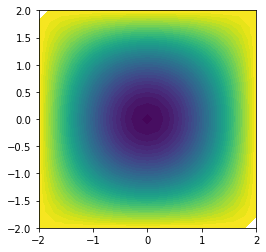

Solving linear variational problem.


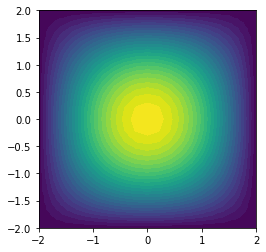

Solving linear variational problem.


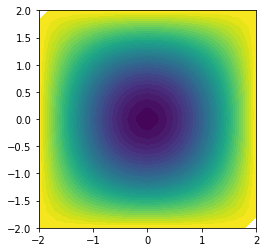

Solving linear variational problem.


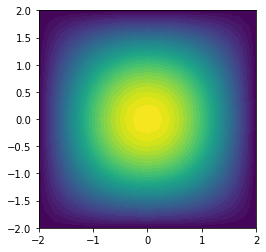

Solving linear variational problem.


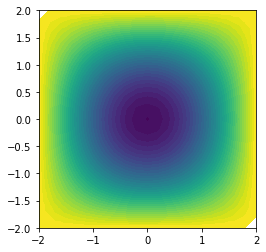

Solving linear variational problem.


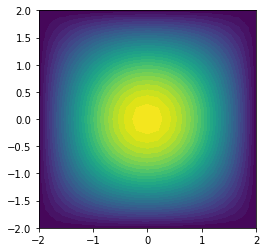

Solving linear variational problem.


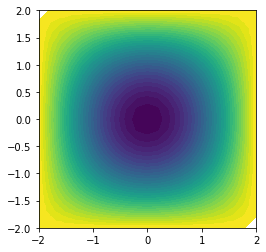

Solving linear variational problem.


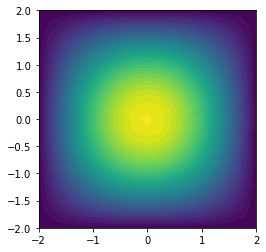

Solving linear variational problem.


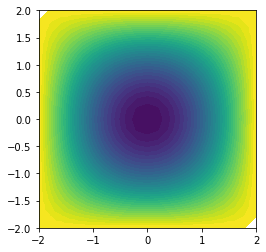

Solving linear variational problem.


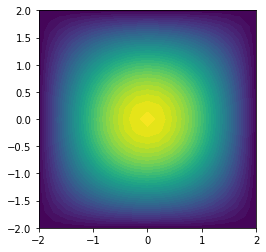

In [103]:
sol_f=fe.Function(space)
# f_list=fe.interpolate(f0,space)
t=0
for i in range(n_times):
    t+=dt
    g.t=t
    fe.solve(fe.lhs(eq)==fe.rhs(eq),sol_f,bcs)
    f0.assign(sol_f)
    fe.plot(sol_f)
    plt.show()
